# Building and Deploying a Fraud Detection Model with Python and Flask

## Introduction

Fraud detection is a critical task for financial institutions. Identifying fraudulent transactions can save millions of dollars and protect users from malicious activities. In this blog post, we will build a fraud detection model using a public dataset from Kaggle and deploy it as a Flask API. We'll cover the entire process, including data preparation, model building, evaluation, and deployment.

## Dataset Overview

We will use the [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) from Kaggle. This dataset contains transactions made by European cardholders in September 2013. It has 284,807 transactions, with 492 frauds, making it highly imbalanced.

### Loading the Dataset

First, let's load the dataset into a pandas DataFrame.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Data Preparation

Before building the model, we need to prepare the data. This includes handling missing values, scaling features, and splitting the dataset into training and test sets.

### Handling Missing Values

Let's check for any missing values in the dataset.

In [3]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


The dataset has no missing values, so we can proceed to the next step.

### Scaling Features

The features `Time` and `Amount` need to be scaled. We will use `StandardScaler` for this purpose.

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' and 'Time' features
scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

### Splitting the Dataset

We will split the dataset into training and test sets. We'll use 70% of the data for training and 30% for testing.

In [5]:
from sklearn.model_selection import train_test_split

# Drop rows where 'Class' is NaN (just in case)
data = data.dropna(subset=['Class'])

# Split the dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


## Exploratory Data Analysis (EDA)

Performing EDA helps us understand the data better. We will visualize the class distribution and correlation matrix.

### Class Distribution

Let's plot the distribution of the target variable `Class`.

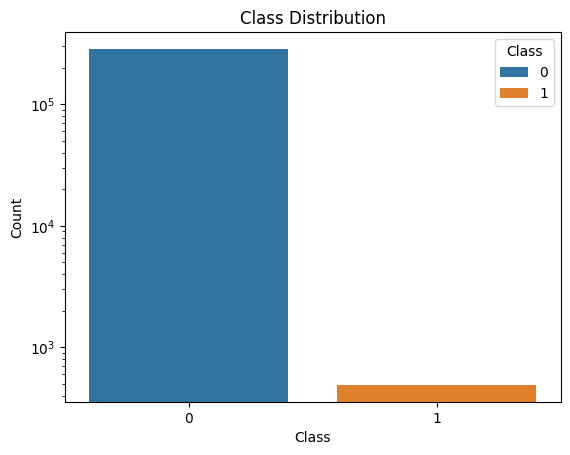

In [13]:
# Plot class distribution
sns.countplot(x='Class', data=data, hue='Class', hue_order=[0, 1])

# Set title and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Show plot
plt.show()


### Correlation Matrix

Visualizing the correlation matrix helps identify relationships between features.

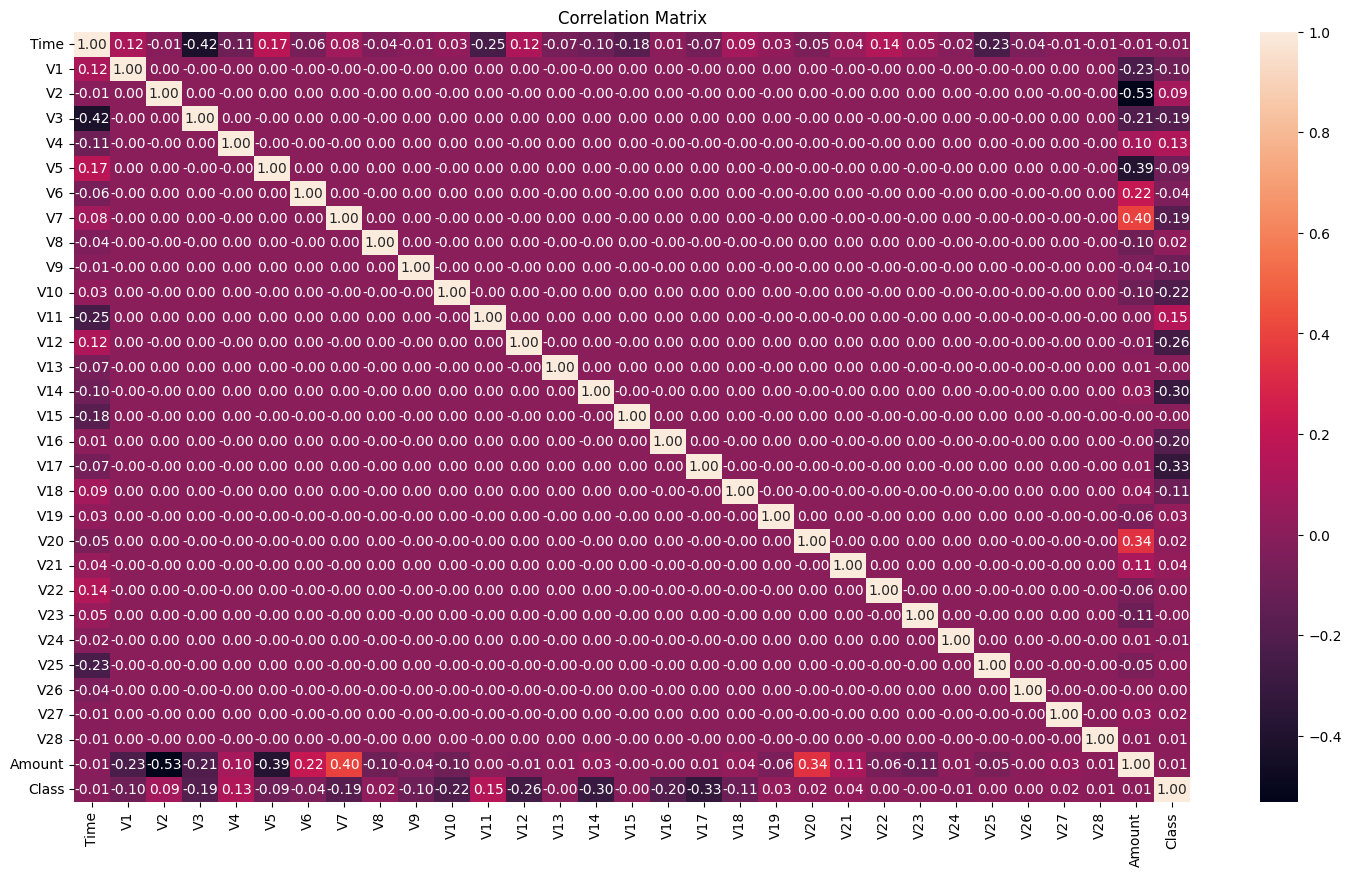

In [10]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model Building

We will use a Random Forest classifier for this task. Random Forests are robust and often perform well on imbalanced datasets.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

## Model Evaluation

Evaluating the model's performance is crucial. We will use precision, recall, F1-score, and ROC-AUC score for evaluation.

### Classification Report and Confusion Matrix

In [14]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.95      0.80      0.87        49

    accuracy                           1.00     28481
   macro avg       0.98      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481



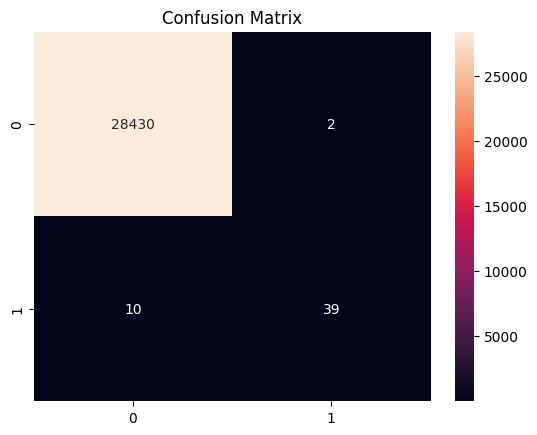

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### ROC-AUC Score

The ROC-AUC score provides a single metric to evaluate the model's performance.

In [18]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 1.00


## Saving the Model

Save the trained model to a file so it can be loaded by the Flask app.

In [16]:
import pickle

# Save the model
with open('fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)